In [1]:
import requests
from bs4 import BeautifulSoup 

In [2]:
response = requests.get('https://www.sofascore.com/football/match/mauritania-egypt/iVbsEVb#id:12526718')

In [3]:
response.status_code

200

In [4]:
soup = BeautifulSoup(response.text, 'html.parser')

In [5]:
soup.select('g[cursor="pointer"]')

[]

In [8]:
import requests

cookies = {
    'gcid_first': '97e51512-31e7-4a24-b7f8-82ab14dad0e4',
    '__browsiSessionID': 'fd2991a7-9651-47f8-a6f0-17f04849059d&true&DEFAULT&eg&desktop-4.32.498&false',
    '__browsiUID': '0983023f-d58b-44b3-9fd0-3096569859e0',
    '_au_1d': 'AU1D-0100-001728689109-ZTVMJA8E-88FE',
    '__qca': 'P0-929949526-1728689108376',
    '_gid': 'GA1.2.612355789.1728689112',
    'FCNEC': '%5B%5B%22AKsRol8X5K6U_YVopvDkXFAFbYsg6r7cTai9uu8bmeUxcLqWvOnoPWQ2m9FubO6sqJVyq6Db153MBBRnl59dzxp2mdHXuHtcSCAY8KIFPJB2dlG_jp-gDeDUSoIX8JxalUTAPk9PQIOYGxDc4hgQlyceQB4NU9EMCg%3D%3D%22%5D%5D',
    '__gads': 'ID=52c65901fc76490c:T=1728689109:RT=1728690206:S=ALNI_MZFfRaR8cAHBnYlY_cP2gvTFa0B7g',
    '__gpi': 'UID=00000f3a0364d430:T=1728689109:RT=1728690206:S=ALNI_MZKPnNC9h_N5i74JshOtIz6DHhgOw',
    '__eoi': 'ID=4bb1b0e5677b81ab:T=1728689109:RT=1728690206:S=AA-AfjZmIl6YM-CFJYhO4hxj6O7l',
    '_ga_HNQ9P9MGZR': 'GS1.1.1728689108.1.1.1728690268.56.0.0',
    '_ga_FVWZ0RM4DH': 'GS1.1.1728690586.1.0.1728690586.60.0.0',
    '_ga': 'GA1.1.172235660.1728689108',
}

headers = {
    'accept': 'application/json, text/javascript, */*; q=0.01',
    'accept-language': 'en-US,en;q=0.9,ar;q=0.8',
    'cache-control': 'max-age=0',
    'referer': 'https://www.sofascore.com/football/match/mauritania-egypt/iVbsEVb',
    'sec-ch-ua': '"Google Chrome";v="129", "Not=A?Brand";v="8", "Chromium";v="129"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36',
    'x-requested-with': '999fd6',
}

response = requests.get('https://www.sofascore.com/api/v1/event/12526718/shotmap', cookies=cookies, headers=headers)

In [9]:
response.status_code

200

In [10]:
shots = response.json()

In [11]:
shots

{'shotmap': [{'player': {'name': 'Oumar Ngom',
    'slug': 'ngom-oumar',
    'shortName': 'O. Ngom',
    'position': 'M',
    'jerseyNumber': '6',
    'userCount': 170,
    'id': 1175854},
   'isHome': False,
   'shotType': 'miss',
   'situation': 'corner',
   'playerCoordinates': {'x': 20.9, 'y': 75.2, 'z': 0},
   'bodyPart': 'right-foot',
   'goalMouthLocation': 'high',
   'goalMouthCoordinates': {'x': 0, 'y': 48.1, 'z': 97.2},
   'id': 3898343,
   'time': 90,
   'addedTime': 1,
   'timeSeconds': 5437,
   'draw': {'start': {'x': 75.2, 'y': 20.9},
    'end': {'x': 51.9, 'y': 0},
    'goal': {'x': 51.9, 'y': 2.8}},
   'reversedPeriodTime': 1,
   'reversedPeriodTimeSeconds': 863,
   'incidentType': 'shot'},
  {'player': {'name': 'Hassan Houbeib',
    'slug': 'hassan-houbeib',
    'shortName': 'H. Houbeib',
    'position': 'D',
    'jerseyNumber': '19',
    'userCount': 163,
    'id': 1016138,
    'fieldTranslations': {'nameTranslation': {'ar': 'الحسن أحويبيب'},
     'shortNameTranslatio

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
shotmap_data = shots

In [26]:
rows = []
for shot in shotmap_data['shotmap']:
    player_info = shot['player']
    row = {
        'Player Name': player_info['name'],
        'Position': player_info.get('position', 'N/A'),  # Using get to avoid KeyError
        'Jersey Number': player_info.get('jerseyNumber', 'N/A'),  # Using get to avoid KeyError
        'Shot Type': shot.get('shotType', 'N/A'),
        'Situation': shot.get('situation', 'N/A'),
        'Coordinates (x, y)': (shot['playerCoordinates'].get('x', 'N/A'), shot['playerCoordinates'].get('y', 'N/A')),
        'Body Part': shot.get('bodyPart', 'N/A'),
        'Goal Mouth Location': shot.get('goalMouthLocation', 'N/A'),
        'Time': shot.get('time', 'N/A'),
        'Added Time': shot.get('addedTime', 'N/A'),  # Using get to avoid KeyError
        'Incident Type': shot.get('incidentType', 'N/A')
    }
    rows.append(row)

df = pd.DataFrame(rows)

df


,Player Name,Position,Jersey Number,Shot Type,Situation,"Coordinates (x, y)",Body Part,Goal Mouth Location,Time,Added Time,Incident Type
0,Oumar Ngom,M,6,miss,corner,"(20.9, 75.2)",right-foot,high,90,1,shot
1,Hassan Houbeib,D,19,miss,corner,"(12.9, 54.6)",right-foot,left,90,1,shot
2,Sidi Amar Bouna,M,9,miss,corner,"(8, 43.8)",head,right,90,1,shot
3,Mohamed Dellahi Yali,M,N/A,block,corner,"(23.5, 49.7)",right-foot,low-right,90,1,shot
4,Hassan Houbeib,D,19,save,corner,"(7.3, 46.1)",head,high-centre,90,N/A,shot
5,Mamadou Diallo,F,9,block,corner,"(9.4, 65.2)",right-foot,low-centre,87,N/A,shot
6,Mohamed Salah,F,11,goal,assisted,"(7.5, 55.7)",right-foot,high-right,79,N/A,shot
7,Aboubakary Koita,F,11,block,assisted,"(18.6, 44.2)",left-foot,low-centre,74,N/A,shot
8,Mahmoud Trézéguet,M,8,goal,corner,"(13.9, 44.5)",right-foot,high-centre,69,N/A,shot
9,Omar Marmoush,F,7,block,assisted,"(24, 30.1)",right-foot,low-centre,69,N/A,shot


In [27]:
shot_counts = df['Player Name'].value_counts()

C:\Users\Blu-Ray\AppData\Local\Temp\ipykernel_22012\3629491492.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shot_counts.index, y=shot_counts.values, palette='viridis')


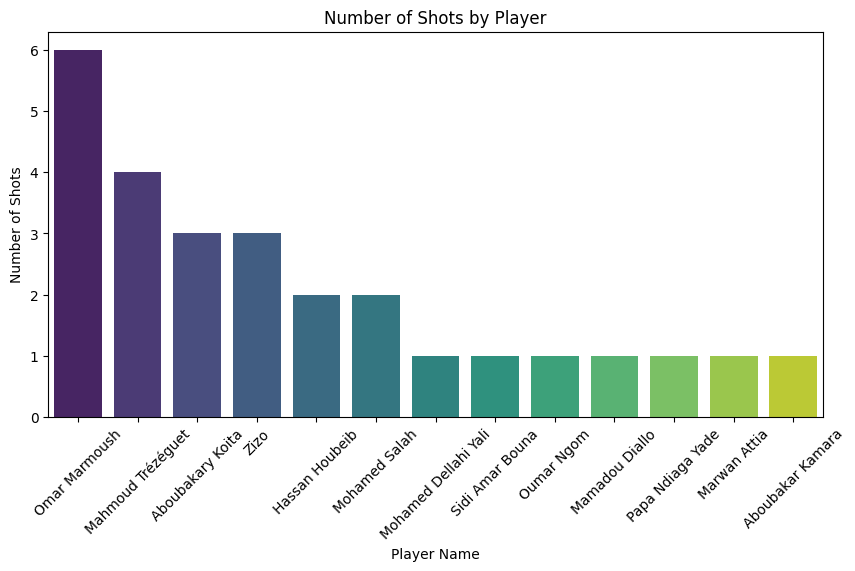

In [51]:
plt.figure(figsize=(10, 5))
sns.barplot(x=shot_counts.index, y=shot_counts.values, palette='viridis')
plt.title('Number of Shots by Player')
plt.xlabel('Player Name')
plt.ylabel('Number of Shots')
plt.xticks(rotation=45)
plt.show()

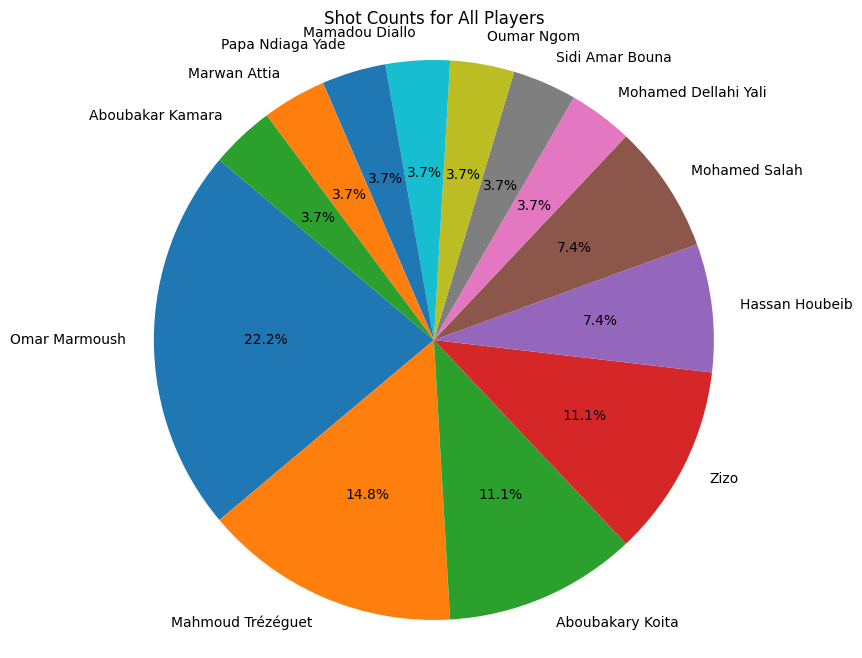

In [49]:
plt.figure(figsize=(10, 8))
plt.pie(shot_counts.values, labels=shot_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Shot Counts for All Players')
plt.axis('equal')
plt.show()

In [71]:
top_shots = shot_counts.nlargest(6)

C:\Users\Blu-Ray\AppData\Local\Temp\ipykernel_22012\2753932410.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_shots.index, y=top_shots.values, palette='rocket')


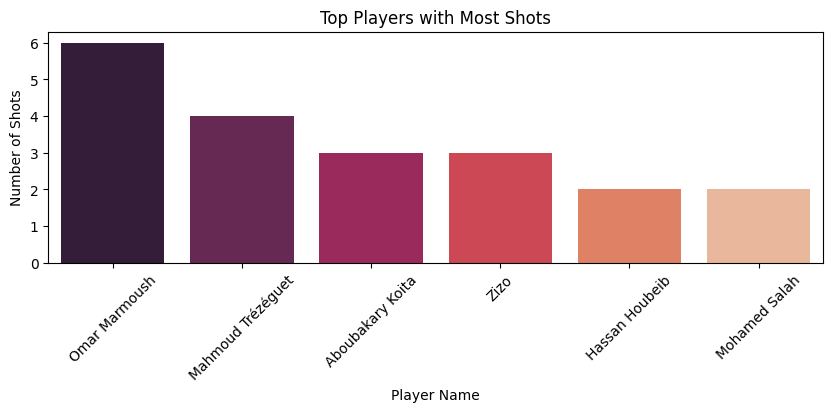

In [72]:
plt.figure(figsize=(10, 3))
sns.barplot(x=top_shots.index, y=top_shots.values, palette='rocket')
plt.title('Top Players with Most Shots')
plt.xlabel('Player Name')
plt.ylabel('Number of Shots')
plt.xticks(rotation=45)
plt.show()

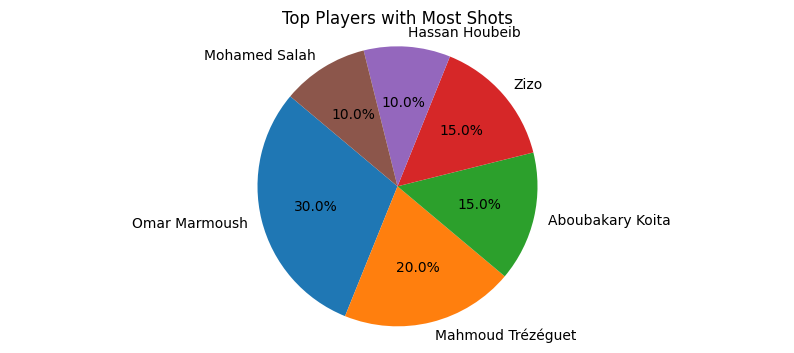

In [73]:
plt.figure(figsize=(10, 4))
plt.pie(top_shots.values, labels=top_shots.index, autopct='%1.1f%%', startangle=140)
plt.title('Top Players with Most Shots')
plt.axis('equal') 
plt.show()

In [35]:
shots_df = pd.DataFrame(shotmap_data['shotmap'])
corner_shots = shots_df[shots_df['situation'] == 'corner']

In [36]:
corner_counts = corner_shots['player'].apply(lambda x: x['name']).value_counts()

C:\Users\Blu-Ray\AppData\Local\Temp\ipykernel_22012\645854819.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=corner_counts.index, x=corner_counts.values, palette='viridis')


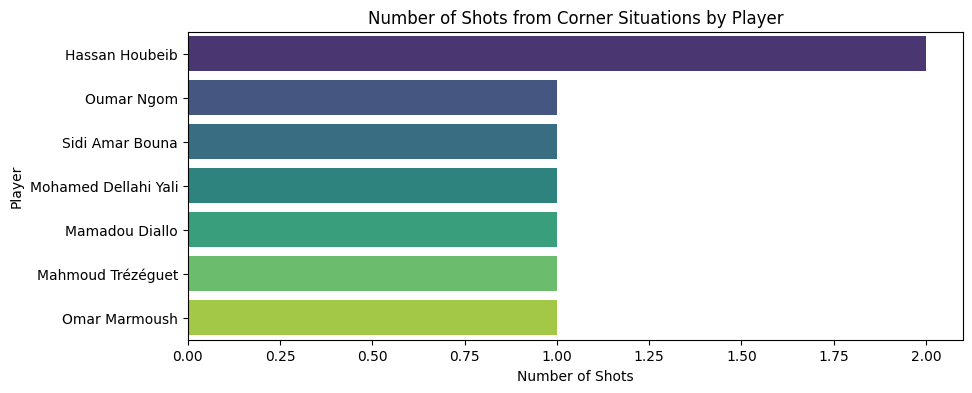

In [42]:
plt.figure(figsize=(10, 4))
sns.barplot(y=corner_counts.index, x=corner_counts.values, palette='viridis')
plt.title('Number of Shots from Corner Situations by Player')
plt.xlabel('Number of Shots')
plt.ylabel('Player')
plt.show()

In [52]:
goal_locations = [shot['goalMouthLocation'] for shot in shotmap_data['shotmap']]

In [53]:
goal_counts = pd.Series(goal_locations).value_counts()

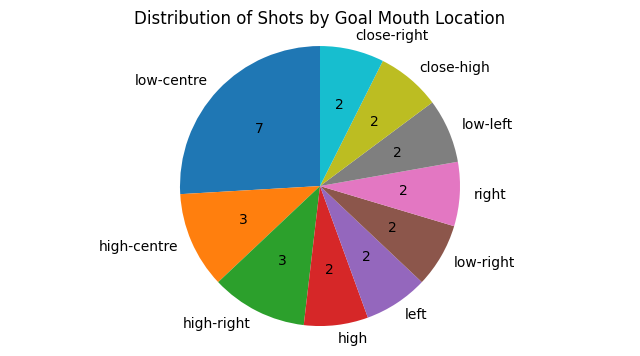

In [76]:
plt.figure(figsize=(8, 4))
plt.pie(goal_counts, labels=goal_counts.index, 
        autopct=lambda p: f'{int(p * sum(goal_counts) / 100)}', startangle=90)
plt.title('Distribution of Shots by Goal Mouth Location')
plt.axis('equal')
plt.show()

In [68]:
least_shots = shot_counts.nsmallest(22)

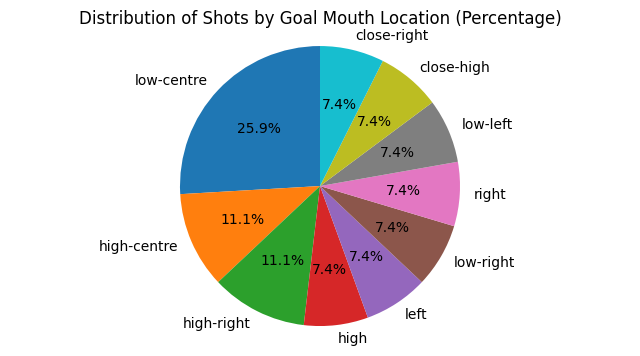

In [80]:
plt.figure(figsize=(8, 4))
plt.pie(goal_counts, labels=goal_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Shots by Goal Mouth Location (Percentage)')
plt.axis('equal') 
plt.show()

C:\Users\Blu-Ray\AppData\Local\Temp\ipykernel_22012\2676382209.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y= least_shots.index, x= least_shots.values, palette='viridis')


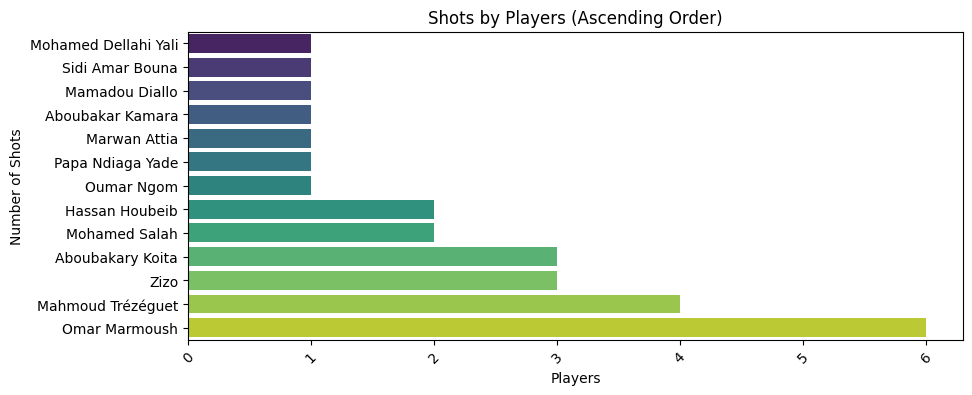

In [78]:
plt.figure(figsize=(10, 4))
sns.barplot(y= least_shots.index, x= least_shots.values, palette='viridis')
plt.title('Shots by Players (Ascending Order)')
plt.xlabel('Players')
plt.ylabel('Number of Shots')
plt.xticks(rotation=45)
plt.show()